**<h2><center>Week 6 Assignment </center></h2>**
<h4><center>Dikshya Shrestha</center></h4>
<h4><center>Presidential Graduate School</center></h4>
<h4><center>PRG 330: Python Programming</center></h4>
<h4><center>Professor Tek Raj Pant </center></h4>
<h4><center>February 16, 2025</center></h4>

# Scikit-Learn

Scikit-learn is an open-source Python library built on top of Numpy, SciPy, and matplotlib, which implements a range of machine learning, pre-processing, cross-validation, and visualization algorithms using a unified interface.

***Scikit-Learn Machine Learning Algorithms***

- Classification: Spam detection, image recognition

        Gradient Boosting, Nearest Neighbors, random fereat, logistic regression, SVM. Naive Bayes, etc

- Regression: Drug response, stock prices

        Gradient Boosting, Nearest Neighbors, Random Forest, Ridge, etc

- Clustering: Automatic grouping of similar objects into sets

        k-Means, HDBSCAN etc

- Dimensionality Reduction: Reduce the number or random variables to consider

        PCA, feature selection, etc.

- Model Selection: Comparing, validating, and choosing parameters and models

        Grid Search, Cross Validation, metrics, etc.

- Preprocessing. Feature Extraction and normalization

        Preprocessing, feature extraction, etc

# Basic Scikit-learn Model Building Process

- **Data Loading and Splitting:** Import and prepare the dataset, splitting it into features and target variables, and dividing the data into training and testing sets.

- **Data Preprocessing:** Normalize/standardize the data if needed.

- **Model Selection:** Choose a model based on the task (regression, classification, etc.).

- **Model Training:** Train the model on the training data

- **Prediction:** Use the trained model to make predictions

- **Evaluation:** Evaluate the model using appropriate metrics (MSE, accuracy, etc.).

- **Inference:** Use the model to predict new data after training

- **Optional:** Hyperparameter tuning to improve performance.

# Linear Regression

# Sales Prediction (marketink-vs-Sales)

Build a multiple linear model which predicts sales based on the money spent on different platforms for marketing

Load Data

In [1]:
import pandas as pd
marketing_data= pd.read_csv('./data/marketing-sales.csv')
marketing_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Cleaning and Pre-Processing

- Fix Data Types
- Normalization (if required)
- Handle missing data
- Perform Data transformation/ filtering(if required)


In [2]:
marketing_data= marketing_data.fillna(marketing_data.mean())

# Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

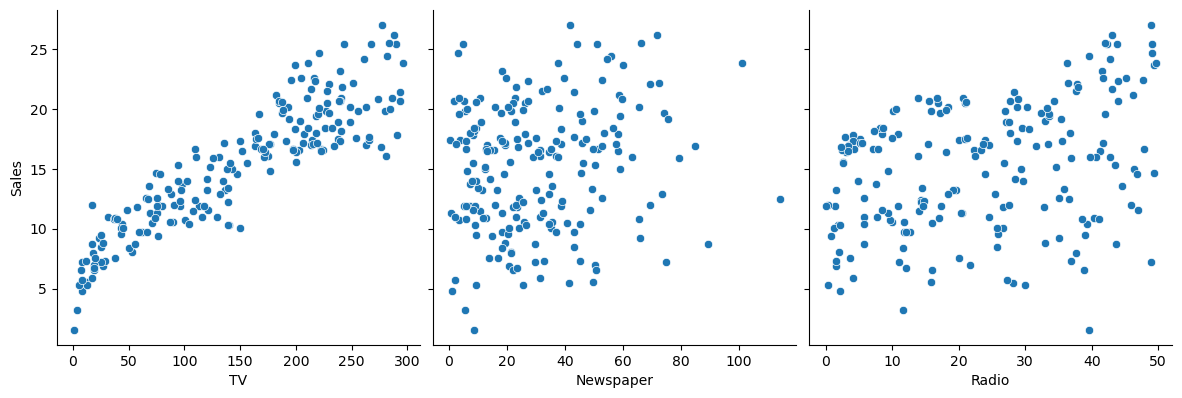

<Axes: >

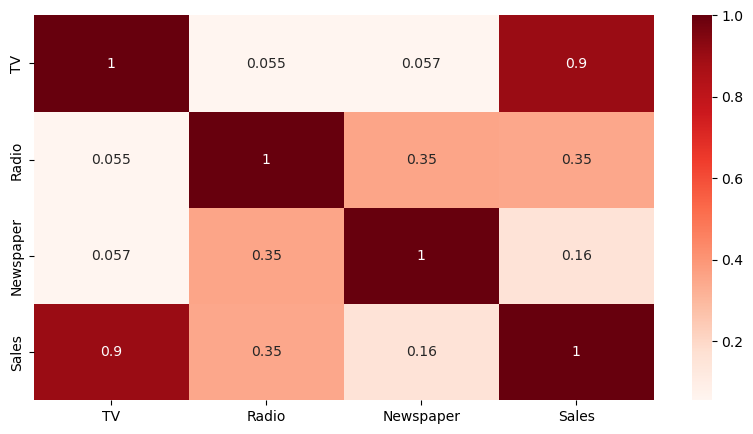

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot between TV-Sales, Newspaper- Sales, Radio-Sales
plt.figure(figsize=(10,5))
sns.pairplot(marketing_data, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1,kind='scatter')
plt.show()

# Heatmap to find out the correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(marketing_data.corr(), cmap="Reds", annot=True)

# Build Multiple Linear Regression Model

- TV, Radio, Newspaper are features (x1, x2, x3)

- Sales is Label (y)

# Prepare Train-Test Dataset

In [4]:
from sklearn.model_selection import train_test_split

#Define features (X) and target (y)

X = marketing_data[['TV', 'Radio', 'Newspaper']]

y= marketing_data ['Sales']

#Split the data into training and testing sets

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42)

# Build Model

In [5]:
from sklearn.linear_model import LinearRegression

#Initialize the model

sales_model = LinearRegression()

#fit data to the model

sales_model.fit(X_train, y_train)

#Print the coefficients

print("Coefficients:", sales_model.coef_)

print("Intercept:", sales_model.intercept_)

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


# Evaluate Model

In [6]:
from sklearn.metrics import mean_squared_error

# Make predictions

y_pred= sales_model.predict(X_test)

#Evaluate the model

mse= mean_squared_error(y_test, y_pred)

rmse= mse* 1/2

print("Mean Squared Error:", mse, rmse)

Mean Squared Error: 2.907756910271091 1.4538784551355455


# Inferences (Use model in real-world)

In [7]:
import numpy as np
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)


# Single data point for inference
tv_ad_cost = 200
radio_ad_cost = 25
news_ad_cost = 40
# create 1x array_len matrix (column matrix)
single_data = np.array([tv_ad_cost,radio_ad_cost,news_ad_cost]).reshape(1,3)
print(single_data)
# Predict sales for the single data point
single_prediction = sales_model.predict(single_data)

# Display the prediction
print(f"Advertising Budget (TV: {tv_ad_cost}, Radio: {radio_ad_cost}, Newspaper: {news_ad_cost}) \
      -> Predicted Sales: {single_prediction[0]:.2f}")

[[200  25  40]]
Advertising Budget (TV: 200, Radio: 25, Newspaper: 40)       -> Predicted Sales: 18.31


# **Homework** ***(Should be included in this notebook and also should be present in assignment PDF)***
- Load the dataset and understand the features
- Perform data preprocessing (handle missing values, normalization if needed).
- Perform Exploratory Data Analysis
- Split the dataset into training and testing sets.
- Build a Multiple Linear Regression model
- Evaluate the model’s performance with R-squared and Root Mean Squared
- Investigate the correlation between features and target and provide an explanation based on model coefficients.
- Inferences (Use model for any real-world value prediction)

GROUP A
- Build a Multiple Linear Regression model to predict house prices from the Boston Housing Dataset
- https://github.com/selva86/datasets/blob/master/BostonHousing.csv

# **Load Dataset of Boston Housing**

In [8]:
import pandas as pd
housing_data= pd.read_csv('./data/BostonHousing.csv') 
housing_data.head(6) 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# Data preprocessing

In [9]:
housing_data = housing_data.fillna(housing_data.mean())

# Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

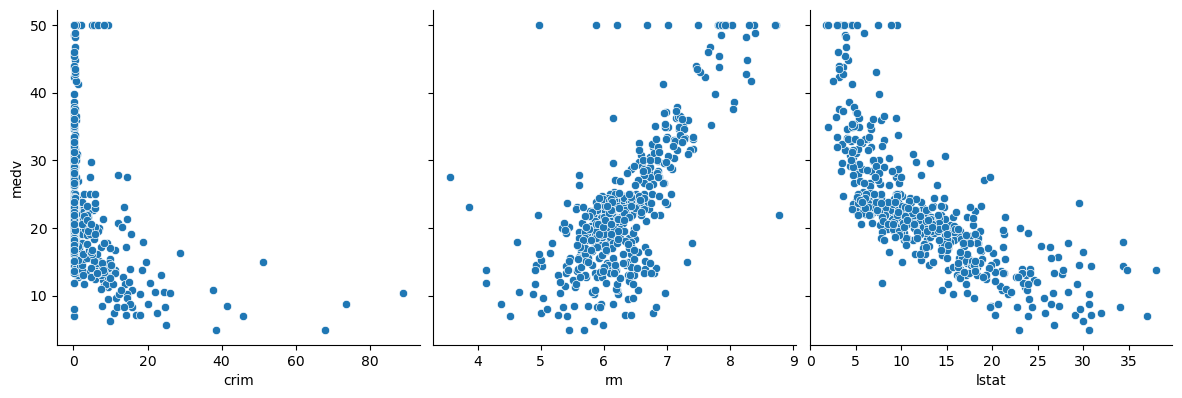

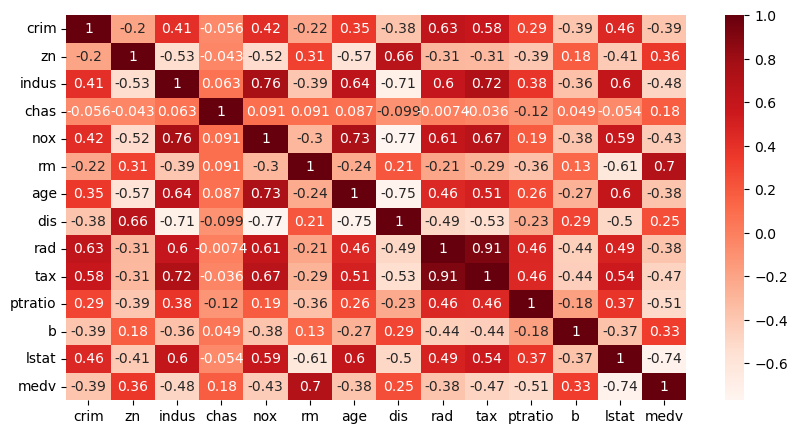

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot between crim-medv, rm-medv, lstat-medv
plt.figure(figsize=(10,5))
sns.pairplot(housing_data, x_vars=['crim','rm','lstat'], y_vars='medv', height=4,\
              aspect=1, kind='scatter')
plt.show()

# Heatmap to find correlation
plt.figure(figsize=(10,5))
sns.heatmap(housing_data.corr(), cmap="Reds", annot=True)
plt.show()

# Prepare Train-Test Dataset

In [11]:
from sklearn.model_selection import train_test_split
X = housing_data[['crim', 'zn', 'indus', 'rm', 'age', 'tax', 'ptratio', 'lstat']]
y = housing_data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                     random_state=42)

# Build a Multiple Linear Regression model

In [12]:
from sklearn.linear_model import LinearRegression

house_price_model = LinearRegression()
house_price_model.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:", house_price_model.coef_)
print("Intercept:", house_price_model.intercept_)

Coefficients: [-8.00855088e-02 -1.26263409e-02  2.96996027e-02  4.97762241e+00
  1.54178379e-02 -2.12446189e-03 -8.26466379e-01 -5.69601343e-01]
Intercept: 13.503834659859193


# Evaluate Model

In [13]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = house_price_model.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 28.84310982156729
Root Mean Squared Error: 5.370578164552424


# Investigate the correlation between features and target

This output shows the relationship between various features (independent variables) and house prices, as determined by the coefficients from a regression model. The coefficients indicate the magnitude and direction of the impact of each feature on the target variable, which in this case is house price.

- **rm** (average number of rooms per dwelling) has the highest positive coefficient (4.98), meaning it has a strong positive influence on house prices. For each unit increase in "rm," house prices increase by approximately 4.98 units, holding all other factors constant.
- **indus** (proportion of industrial land) has a small positive coefficient (0.03), suggesting a slight positive effect on house prices, although this effect is minimal.
- **age** (proportion of older homes) has a small positive coefficient (0.015), meaning older homes have a small, positive correlation with house prices.
- **tax** (property tax rate) has a very small negative coefficient (-0.0021), suggesting that higher taxes slightly decrease house prices, but the effect is negligible.
- **zn** (proportion of residential land zoned for large lots) has a negative coefficient (-0.0126), implying that higher proportions of such zoning are associated with lower house prices, although the effect is again minimal.
- **crim** (crime rate) has a negative coefficient (-0.0801), indicating that higher crime rates are associated with lower house prices.
- **lstat** (percentage of lower status population) has a strongly negative coefficient (-0.5696), showing that a higher percentage of lower-status population in an area is associated with a significant decrease in house prices.
- **ptratio** (pupil-teacher ratio in schools) has a negative coefficient (-0.8265), indicating that areas with higher pupil-teacher ratios tend to have lower house prices.

In summary, features like "rm" have a positive and significant impact on house prices, while others like "lstat" and "ptratio" show a stronger negative impact. Features like "indus," "age," and "tax" have minimal effects.

In [14]:
feature_correlation = pd.DataFrame({'Feature': X.columns, \
                                    'Coefficient': house_price_model.coef_})
print(feature_correlation.sort_values(by='Coefficient', ascending=False))

   Feature  Coefficient
3       rm     4.977622
2    indus     0.029700
4      age     0.015418
5      tax    -0.002124
1       zn    -0.012626
0     crim    -0.080086
7    lstat    -0.569601
6  ptratio    -0.826466


# Inferences (Use model in real-world)

In [15]:
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)

# Single data point for inference
crim_value = 0.03
zn_value = 10
indus_value = 5
rm_value = 6.5
age_value = 65
tax_value = 250
ptratio_value = 17
lstat_value = 5

# create 1x array_len matrix (column matrix)
single_data = np.array([crim_value, zn_value, indus_value, rm_value, age_value,\
                         tax_value, ptratio_value, lstat_value]).reshape(1, -1)
print(single_data)

# Predict house price for the single data point
single_prediction = house_price_model.predict(single_data)

# Display the prediction
print(f"Housing Features (CRIM: {crim_value}, ZN: {zn_value}, INDUS: {indus_value},\
       RM: {rm_value}, AGE: {age_value}, TAX: {tax_value}, PTRATIO: {ptratio_value},\
          LSTAT: {lstat_value}) -> Predicted House Price: {single_prediction[0]:.2f}")


[[3.0e-02 1.0e+01 5.0e+00 6.5e+00 6.5e+01 2.5e+02 1.7e+01 5.0e+00]]
Housing Features (CRIM: 0.03, ZN: 10, INDUS: 5,       RM: 6.5, AGE: 65, TAX: 250, PTRATIO: 17,          LSTAT: 5) -> Predicted House Price: 29.45


In [16]:
input_data = np.array([0.03, 10, 5, 6.5, 65, 250, 17, 5]).reshape(1, -1)

# Predict the house price using the trained model
predicted_price = house_price_model.predict(input_data)
print(f"Predicted House Price: {predicted_price[0]:.2f}")

Predicted House Price: 29.45


# **Classification**

**Gaussian Naive Bayes Classifier**

Load, and prepare dataset

In [17]:
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris() 
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,\
             'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Split data into test and train dataset**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=42)

**Train the GNB Classifier**

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

**Make predictions**

In [20]:
# Make predictions
y_pred = gnb.predict(X_test)

**Evaluate the model**

In [21]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Homework** ***(Should be included in this notebook and also should be present in assignment PDF)***
- Load the dataset and understand the features
- Perform data processing
- Perform Exploratory Data Analysis & Visualize the data using various graphs
- Split the dataset into training and testing sets
- Build a Gaussian Naive Bayes (GNB) classification model
- Evaluate the model's performance

# **Load Dataset of Diabetes**

In [22]:
import pandas as pd
from IPython.display import display

# Load the diabetes dataset
diabetes_df = pd.read_csv('data/diabetes.csv')

# Display the first few rows
display(diabetes_df.head(6))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


# Data Processing

In [23]:
# Fill missing values with the mean of each column
diabetes_df = diabetes_df.fillna(diabetes_df.mean())


# Exploratory Data Analysis 

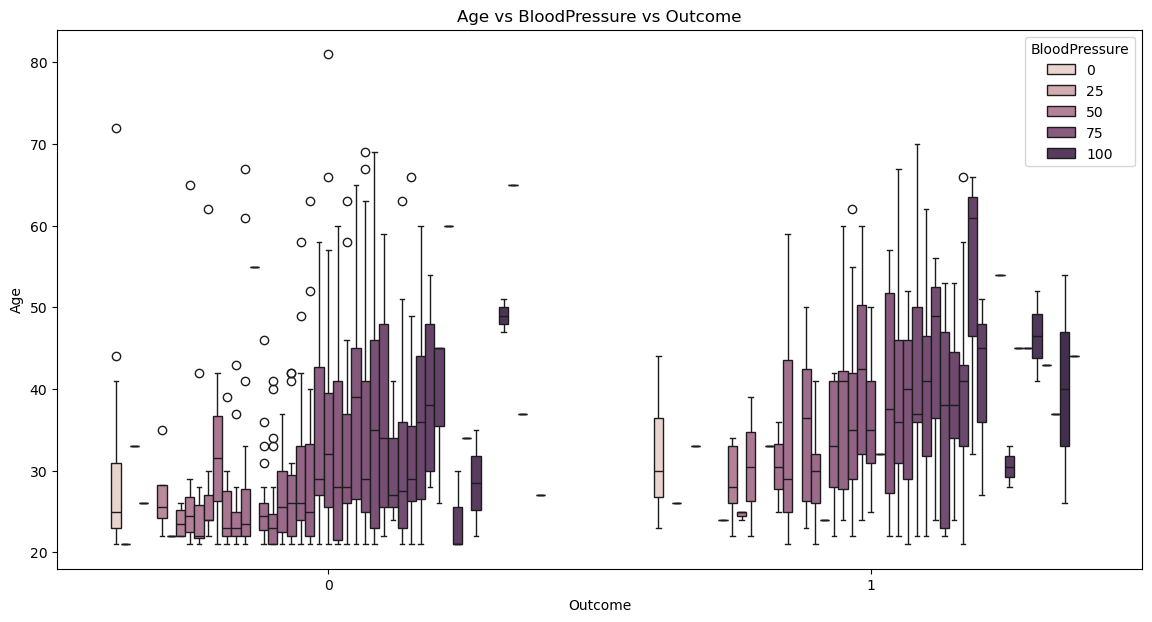

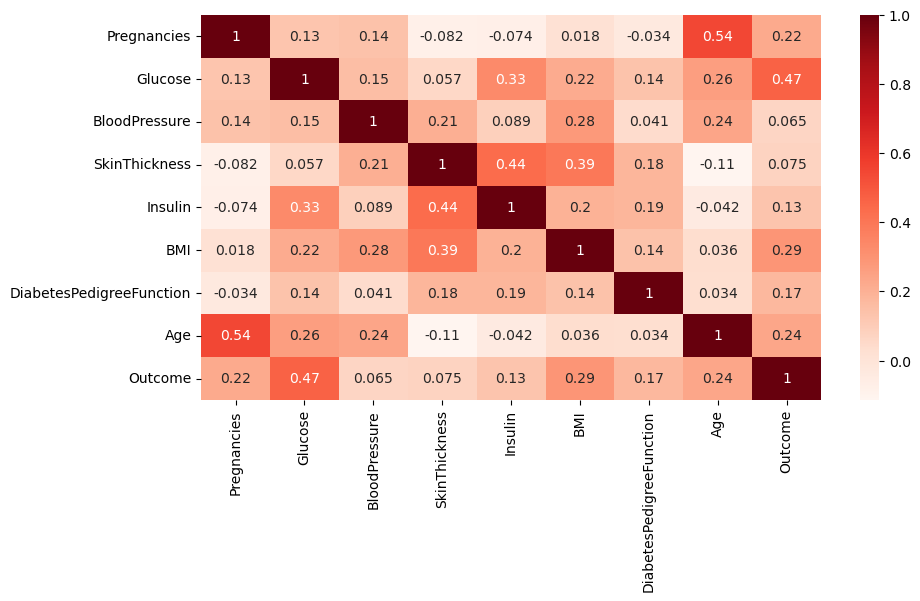

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a boxplot comparing Age and BloodPressure for each Outcome
plt.figure(figsize=(14, 7))
sns.boxplot(x='Outcome', y='Age', hue='BloodPressure', data=diabetes_df)

# Add a title and display the plot
plt.title('Age vs BloodPressure vs Outcome')
plt.show()

# Heatmap to find correlations
plt.figure(figsize=(10, 5))
sns.heatmap(diabetes_df.corr(), cmap="Reds", annot=True)
plt.show()


# Split data into test and train dataset

In [25]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = diabetes_df['Outcome']  # Target (No Diabetes or Diabetes)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,\
                                                     random_state=42)


# Build a Gaussian Naive Bayes (GNB) classification model

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [27]:
# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model

In [28]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# Evaluation Criteria:
- Accuracy: Measures the proportion of correct predictions.
- Precision: Indicates the proportion of true positives out of all predicted positives.
- Recall: Measures the proportion of true positives out of all actual positives.
- F1-Score: A harmonic mean of precision and recall, useful for imbalanced datasets.
- Confusion Matrix: A table that summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives.

# Clustering
- Clustering is the process of arranging a group of objects in such a manner that the objects in the same group (which is referred to as a cluster) are more similar to each other than to the objects in any other group.

# Clustering Algorithms
- K-means
- MeanShift
- DBSCAN

# K-Means Clustering Algorithm
- Choose the Number of Clusters (k): We decide how many clusters you want the data divided into.

- Initialize Cluster Centers: Randomly select k points from the data as initial cluster centers (also called centroids).

- Assign Data Points to Clusters: Each data point is assigned to the cluster whose centroid is closest (measured by distance, usually Euclidean).

- Update Centroids: For each cluster, compute the new centroid as the average of all points assigned to that cluster.

- Repeat: Reassign points to clusters based on the updated centroids and recompute the centroids. This process is repeated until the centroids stop changing significantly or a maximum number of iterations is reached.

- Finally The algorithm returns the final clusters and their centroids, after n number of iteration (max_iter)

In [29]:
import pandas as pd
home_data = pd.read_csv('data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# Plot scattered plot to visualize the data

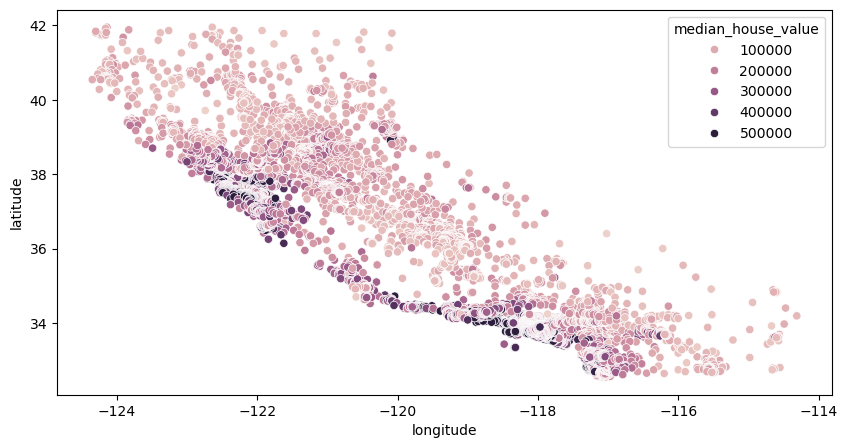

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')
plt.show()

# Split Train/Test and Normalize Data

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']],\
                        home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Fit the data to the K-Means Model and plot the clusters into scattered Plot


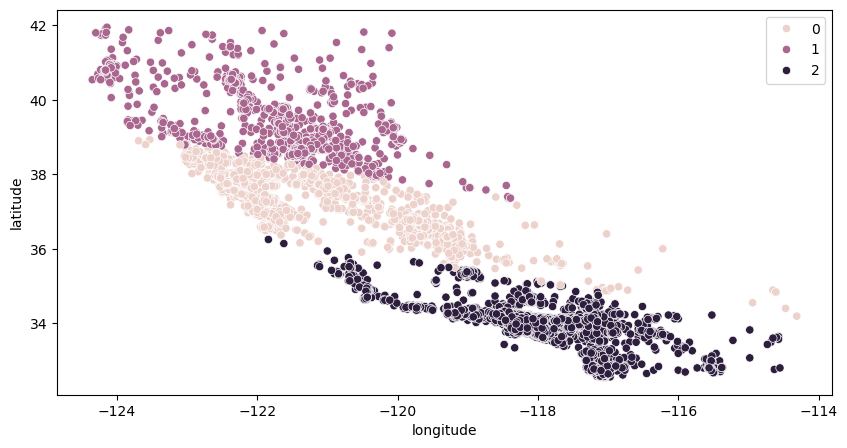

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

plt.figure(figsize=(10,5))
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)
plt.show()

# Evaluate Clustering Model using Silhouetee Score (lower score represents a better fit)


In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703547

# Nepali Number Recognition System

# Tensorflow 

<b>Tensorflow is an open-source machine learning framework developed by Google.</b>

It is widely used for:

- Building and training machine learning models

- Deep Learning applications

- Neural networks

- Natural language processing (NLP)

- Image recognition

- Time series analysis

- Reinforcement learning